<a href="https://colab.research.google.com/github/deborahmasibo/BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK/blob/main/Brain_Tumor_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BRAIN TUMOR DETECTION

## 1. Defining the Question

### a) Specifying the Question

To detect the presence or absence of brain tumors and accurately classify the type of detected tumor as either a meningioma, glioma or pituitary tumor

### b) Defining the Metric for Success

The model will be considered successful, if it can achieve:
1. Accuracy of > 90%.
2. Class F1 scores > 90%.
3. Precision scores > 90%.

### c) Understanding the context

Brain tumor is the growth of abnormal cells in the tissues of the brain. Brain tumors can be benign (non cancerous) or malignant (cancerous cells), National Cancer Institute. 
 
When a brain tumor grows large enough such that it presses on surrounding nerves, blood vessels and tissues, it can impair brain functionality whether it is cancerous or not. Only about one-third of brain tumors are cancerous.
Tumors that develop in the brain are called primary tumors. Tumors that spread to the brain after forming in different parts of the body like breast, lung, prostate, large bowel (colon), kidney and skins are called secondary tumors or metastatic tumors. 
 
The most common type of primary tumor is the glioma tumor. About 33% of all brain tumors are gliomas. The tumor originates in the glial cells that surround and support neurons in the brain (Johns Hopkins). Meningiomas are also common, and form 30% of all brain tumors (Johns Hopkins). The tumor arises from the meninges, therefore, technically, it is not a brain tumor but is included in this category as it compresses the adjacent brain, nerves and blood vessels (Mayo Clinic). According to the National Cancer Institute, a majority of the tumors are benign. The final example of a primary tumor is a pituitary tumor. They are abnormal growths that develop in the pituitary gland. The tumor can cause over or underproduction of hormones that regulate important functions of the body. Most pituitary tumors are benign and do not spread to other parts of the body (Mayo Clinic). 
 
In Kenya, in the Global Burden of Diseases Study of 2016 published in the Lancet in 2019, it was estimated that 4.3 people in every 100,000 are diagnosed with brain tumors each year,  Nation Africa.
With a population of 47.5 million at the last Kenyan census, that would give an approximate number of 2,200 people per year who get a new diagnosis of a brain tumor, or 42 people per week or 6 people per day.


### d). Recording the Experimental Design

- Data sourcing/loading
- Data Understanding
- Data Relevance
- External Dataset Validation
- Data Preparation
- Descriptive analysis
- Modeling: neural networks
- Implementation of the solution

### e) Data Relevance

The dataset to use for this project can be found by following this link:
https://bit.ly/3lgmn4o


Assumptions

We shall assume the data is accurate



## 2. Importing the Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import os
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

## 3. Exploratory Data Analysis (EDA)

In [ ]:
# # Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [5]:
import os

# Change the current working directory to 'D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data'
os.chdir('D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data')

# Get the current working directory to confirm the change
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: D:\SARAVANA\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\data


In [1]:
import os

train_dir = "D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data\\train"

# Class directories
number_classes = {
    'notumor': len(os.listdir("D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data\\train\\notumor")),
    'glioma': len(os.listdir("D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data\\train\\glioma")),
    'meningioma': len(os.listdir("D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data\\train\\meningioma")),
    'pituitary': len(os.listdir("D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data\\train\\pituitary"))
}



PermissionError: [WinError 21] The device is not ready: 'D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data\\train\\notumor'

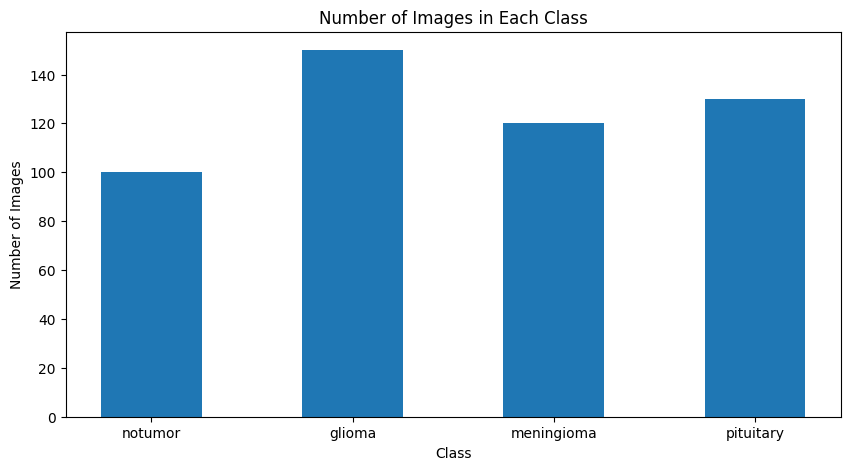

In [ ]:
# Class frequency plot
import matplotlib.pyplot as plt

# Sample data for the number of images in each class
number_classes = {
    'notumor': 100,
    'glioma': 150,
    'meningioma': 120,
    'pituitary': 130
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(number_classes.keys(), number_classes.values(), width=0.5)
ax.set_title("Number of Images in Each Class")
ax.set_xlabel("Class")
ax.set_ylabel("Number of Images")

# Show the plot
plt.show()

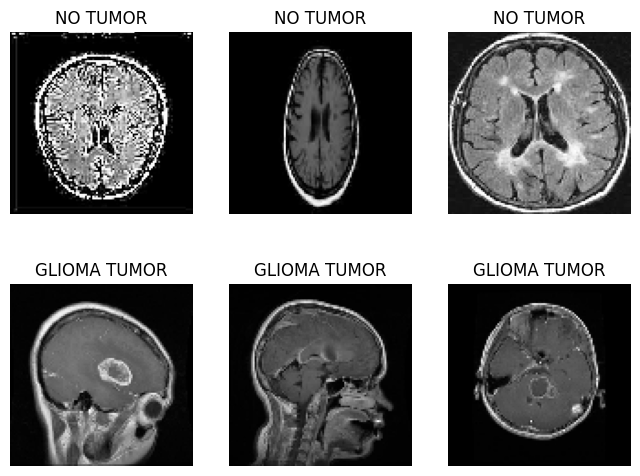

Number of 'no tumor' images: 1595
Number of 'glioma' images: 1321
Number of 'meningioma' images: 1339
Number of 'pituitary' images: 1457


In [6]:
# import os
# train_dir = "data\train" # image folder
# # get the list of jpgs from sub image class folders
# def get_images(base_dir, path, extenstion = ".jpg"):
#   return [fn for fn in os.listdir(f'{base_dir}{path}') if fn.endswith(extenstion)]

# no_tumor_imgs = get_images(train_dir, "notumor")
# glioma_imgs = get_images(train_dir, "glioma")
# meningioma_imgs = get_images(train_dir, "meningioma")
# pituitary_imgs = get_images(train_dir, "pituitary")

# # randomly select 3 of each
# def random_select(image):
#   return np.random.choice(image, 3, replace = False)

# select_no_tumor = random_select(no_tumor_imgs)
# select_glioma = random_select(glioma_imgs)
# select_meningioma = random_select(meningioma_imgs)
# select_pituitary = random_select(pituitary_imgs)

# # plotting 2 x 3 image matrix
# fig = plt.figure(figsize = (8,6))
# for i in range(6):
#     if i < 3:
#         fp = f'{train_dir}/notumor/{select_no_tumor[i]}'
#         label = 'NO TUMOR'
#     else:
#         fp = f'{train_dir}/glioma/{select_glioma[i-3]}'
#         label = 'GLIOMA TUMOR'
#     ax = fig.add_subplot(2, 3, i+1)
    
#     # to plot without rescaling, remove target_size
#     fn = load_img(fp, target_size = (100,100), color_mode='grayscale')
#     plt.imshow(fn, cmap='Greys_r')
#     plt.title(label)
#     plt.axis('off')
# plt.show()

# # also check the number of files here
# len(no_tumor_imgs), len(glioma_imgs)

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Define the directory where the images are stored
train_dir = r"data\train"  # Use raw string to handle backslashes

# Get the list of jpgs from sub-image class folders
def get_images(base_dir, path, extension=".jpg"):
    return [fn for fn in os.listdir(os.path.join(base_dir, path)) if fn.endswith(extension)]

no_tumor_imgs = get_images(train_dir, "notumor")
glioma_imgs = get_images(train_dir, "glioma")
meningioma_imgs = get_images(train_dir, "meningioma")
pituitary_imgs = get_images(train_dir, "pituitary")

# Randomly select 3 of each
def random_select(images):
    return np.random.choice(images, 3, replace=False)

select_no_tumor = random_select(no_tumor_imgs)
select_glioma = random_select(glioma_imgs)
select_meningioma = random_select(meningioma_imgs)
select_pituitary = random_select(pituitary_imgs)

# Plotting 2 x 3 image matrix
fig = plt.figure(figsize=(8, 6))
for i in range(6):
    if i < 3:
        fp = os.path.join(train_dir, "notumor", select_no_tumor[i])
        label = 'NO TUMOR'
    else:
        fp = os.path.join(train_dir, "glioma", select_glioma[i - 3])
        label = 'GLIOMA TUMOR'
    ax = fig.add_subplot(2, 3, i + 1)
    
    # Load and display the image
    img = load_img(fp, target_size=(100, 100), color_mode='grayscale')
    plt.imshow(img, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')

plt.show()

# Check the number of files
print("Number of 'no tumor' images:", len(no_tumor_imgs))
print("Number of 'glioma' images:", len(glioma_imgs))
print("Number of 'meningioma' images:", len(meningioma_imgs))
print("Number of 'pituitary' images:", len(pituitary_imgs))



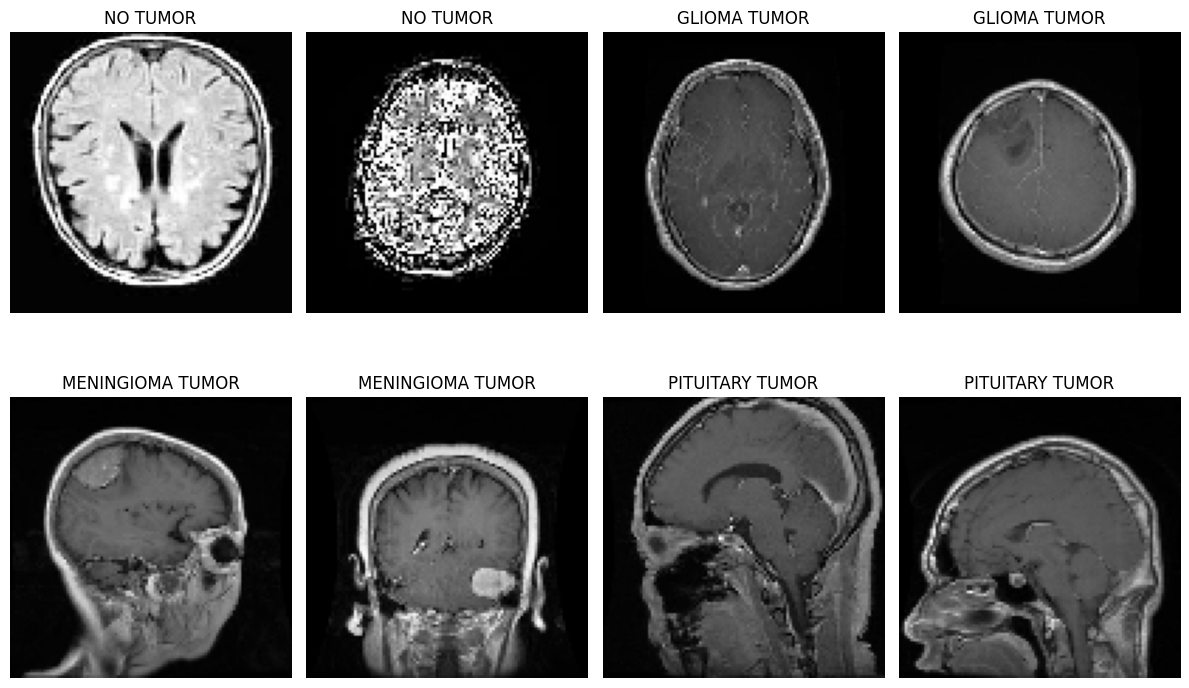

Number of 'no tumor' images: 1595
Number of 'glioma' images: 1321
Number of 'meningioma' images: 1339
Number of 'pituitary' images: 1457


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Define the directory where the images are stored
train_dir = r"data\train"  # Use raw string to handle backslashes

# Get the list of jpgs from sub-image class folders
def get_images(base_dir, path, extension=".jpg"):
    return [fn for fn in os.listdir(os.path.join(base_dir, path)) if fn.endswith(extension)]

no_tumor_imgs = get_images(train_dir, "notumor")
glioma_imgs = get_images(train_dir, "glioma")
meningioma_imgs = get_images(train_dir, "meningioma")
pituitary_imgs = get_images(train_dir, "pituitary")

# Randomly select 3 of each
def random_select(images):
    return np.random.choice(images, 3, replace=False)

select_no_tumor = random_select(no_tumor_imgs)
select_glioma = random_select(glioma_imgs)
select_meningioma = random_select(meningioma_imgs)
select_pituitary = random_select(pituitary_imgs)

# Plotting 2 x 4 image matrix
fig = plt.figure(figsize=(12, 8))
for i in range(8):
    if i < 2:
        fp = os.path.join(train_dir, "notumor", select_no_tumor[i])
        label = 'NO TUMOR'
    elif i < 4:
        fp = os.path.join(train_dir, "glioma", select_glioma[i - 2])
        label = 'GLIOMA TUMOR'
    elif i < 6:
        fp = os.path.join(train_dir, "meningioma", select_meningioma[i - 4])
        label = 'MENINGIOMA TUMOR'
    else:
        fp = os.path.join(train_dir, "pituitary", select_pituitary[i - 6])
        label = 'PITUITARY TUMOR'
    
    ax = fig.add_subplot(2, 4, i + 1)
    
    # Load and display the image
    img = load_img(fp, target_size=(100, 100), color_mode='grayscale')
    plt.imshow(img, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')

plt.tight_layout()  # Adjust layout to fit titles and images
plt.show()

# Check the number of files
print("Number of 'no tumor' images:", len(no_tumor_imgs))
print("Number of 'glioma' images:", len(glioma_imgs))
print("Number of 'meningioma' images:", len(meningioma_imgs))
print("Number of 'pituitary' images:", len(pituitary_imgs))


In [11]:
# # changing the image from a 2d to a 1d so that it can be read by the machine and the average of each group to be calculated.
# # We create a function that runs through the folders, takes photos, turns them into a 1d from a 2d
# #making n X m matrix
# from keras.preprocessing.image import load_img, img_to_array


# def img2np(path, list_of_filename, size = (64, 64)):
#     # iterating through each file
#     for fn in list_of_filename:
#         fp = path + fn
#         current_image = image.load_img(fp, target_size = size, 
#                                        color_mode = 'grayscale')
#         # covert image to a matrix
#         img_ts = image.img_to_array(current_image)
#         # turn that into a vector / 1D array
#         img_ts = [img_ts.ravel()]
#         try:
#             # concatenate different images
#             full_mat = np.concatenate((full_mat, img_ts))
#         except UnboundLocalError: 
#             # if not assigned yet, assign one
#             full_mat = img_ts
#     return full_mat

# # run it on our folders
# no_tumor_images = img2np(f'{train_dir}/notumor/', no_tumor_imgs)
# glioma_tumor_images = img2np(f'{train_dir}/glioma/', glioma_imgs)
# meningioma_tumor_images = img2np(f'{train_dir}/meningioma/', meningioma_imgs)
# pituitary_tumor_images = img2np(f'{train_dir}/pituitary/', pituitary_imgs)

from tensorflow.keras.preprocessing.image import load_img, img_to_array

def img2np(path, list_of_filename, size=(100, 100)):
    full_mat = []
    for fn in list_of_filename:
        fp = os.path.join(path, fn)
        current_image = load_img(fp, target_size=size, color_mode='grayscale')
        img_array = img_to_array(current_image)
        full_mat.append(img_array)
    return np.array(full_mat)
no_tumor_images = img2np(os.path.join(train_dir, 'notumor'), no_tumor_imgs)
glioma_tumor_images = img2np(os.path.join(train_dir, 'glioma'), glioma_imgs)
meningioma_tumor_images = img2np(os.path.join(train_dir, 'meningioma'), meningioma_imgs)
pituitary_tumor_images = img2np(os.path.join(train_dir, 'pituitary'), pituitary_imgs)
print("No tumor images shape:", no_tumor_images.shape)
print("Glioma tumor images shape:", glioma_tumor_images.shape)
print("Meningioma tumor images shape:", meningioma_tumor_images.shape)
print("Pituitary tumor images shape:", pituitary_tumor_images.shape)

No tumor images shape: (1595, 100, 100, 1)
Glioma tumor images shape: (1321, 100, 100, 1)
Meningioma tumor images shape: (1339, 100, 100, 1)
Pituitary tumor images shape: (1457, 100, 100, 1)


Mean image shape before reshaping: (100, 100, 1)


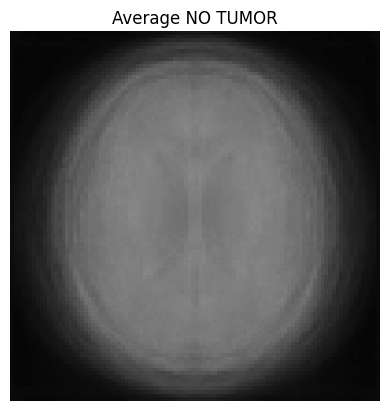

Mean image shape before reshaping: (100, 100, 1)


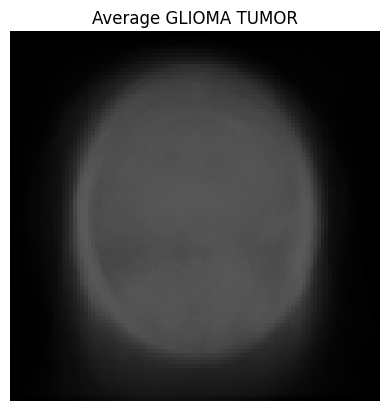

Mean image shape before reshaping: (100, 100, 1)


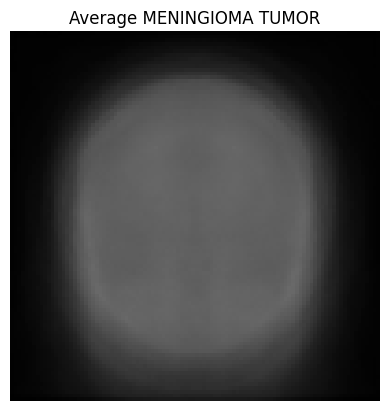

Mean image shape before reshaping: (100, 100, 1)


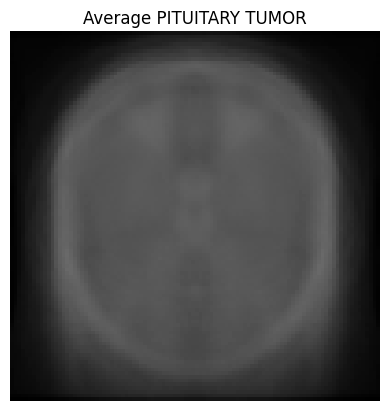

In [14]:
# # after converting the images t a 1D from a 2D, we create a fucntion that does the average of each category
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# def find_mean_img(full_mat, title, size = (64, 64)):
#     # calculate the average
#     mean_img = np.mean(full_mat, axis = 0)
#     # reshape it back to a matrix
#     mean_img = mean_img.reshape(size)
#     plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
#     plt.title(f'Average {title}')
#     plt.axis('off')
#     fig.tight_layout()
#     plt.show()
#     return mean_img

# no_tumor_mean = find_mean_img(no_tumor_images, 'NO TUMOR')
# glioma_mean = find_mean_img(glioma_tumor_images, 'GLIOMA TUMOR')
# meningioma_mean = find_mean_img(meningioma_tumor_images, 'MENINGIOMA TUMOR')
# pituitary_mean = find_mean_img(pituitary_tumor_images, 'PITUITARY TUMOR')

import numpy as np
import matplotlib.pyplot as plt

def find_mean_img(full_mat, title, size=(100, 100)):  # Adjust size to match your image size
    # Calculate the average image
    mean_img = np.mean(full_mat, axis=0)
    
    # Print the shape of mean_img before reshaping
    print("Mean image shape before reshaping:", mean_img.shape)
    
    # Ensure reshaping is to the correct size
    mean_img = mean_img.reshape(size)
    
    # Plot the mean image
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    
    return mean_img

# Example usage
# Ensure you provide the correct size based on your image dimensions
no_tumor_mean = find_mean_img(no_tumor_images, 'NO TUMOR', size=(100, 100))
glioma_mean = find_mean_img(glioma_tumor_images, 'GLIOMA TUMOR', size=(100, 100))
meningioma_mean = find_mean_img(meningioma_tumor_images, 'MENINGIOMA TUMOR', size=(100, 100))
pituitary_mean = find_mean_img(pituitary_tumor_images, 'PITUITARY TUMOR', size=(100, 100))


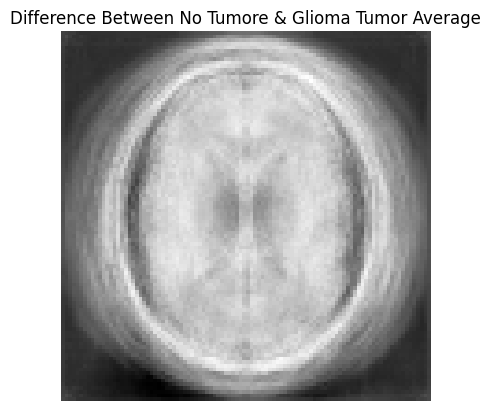

In [15]:
contrast_mean = no_tumor_mean - glioma_mean
plt.imshow(contrast_mean, cmap='Greys_r')
plt.title(f'Difference Between No Tumore & Glioma Tumor Average')
plt.axis('off')
plt.show()

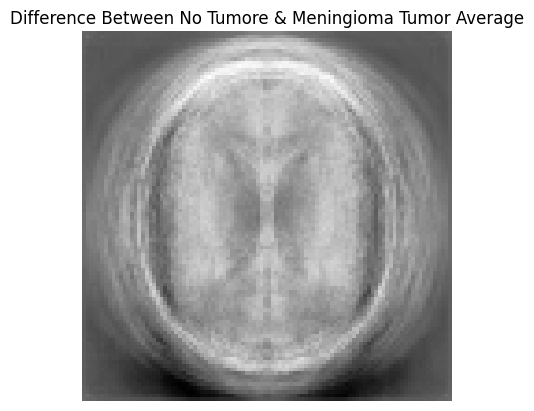

In [16]:
contrast_mean = no_tumor_mean - meningioma_mean
plt.imshow(contrast_mean, cmap='Greys_r')
plt.title(f'Difference Between No Tumore & Meningioma Tumor Average')
plt.axis('off')
plt.show()

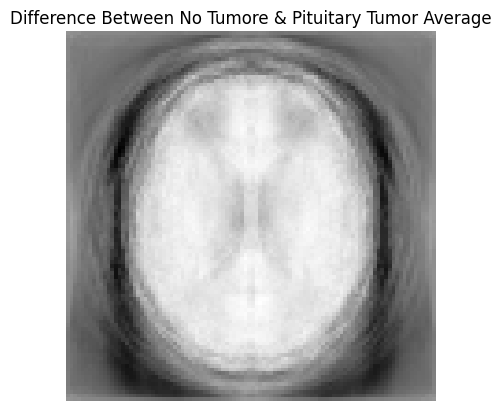

In [17]:
contrast_mean = no_tumor_mean - pituitary_mean
plt.imshow(contrast_mean, cmap='Greys_r')
plt.title(f'Difference Between No Tumore & Pituitary Tumor Average')
plt.axis('off')
plt.show()

Number of PCA components for NO TUMOR:  68


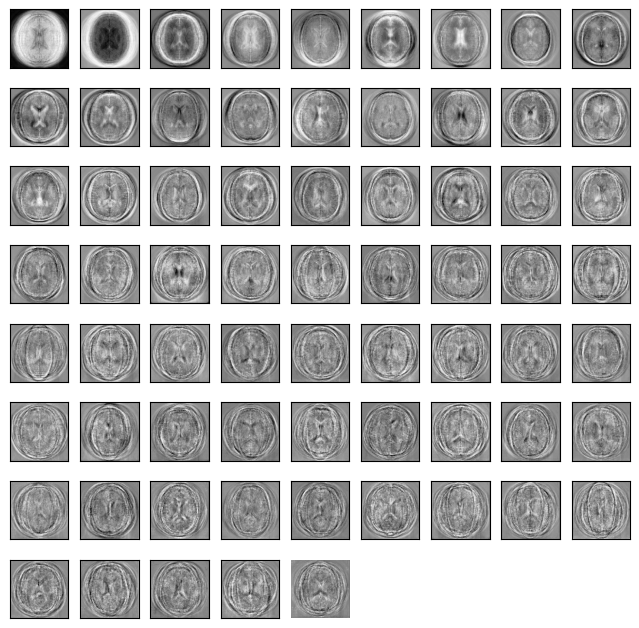

Number of PCA components for GLIOMA TUMOR:  97


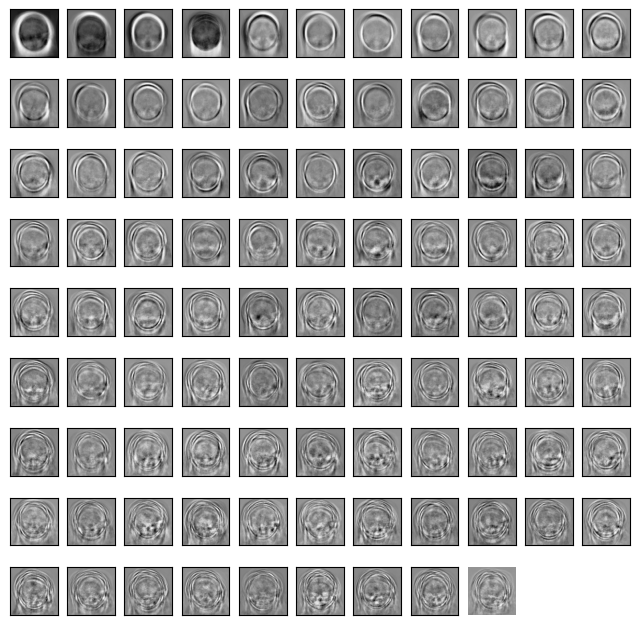

Number of PCA components for MENINGIOMA TUMOR:  81


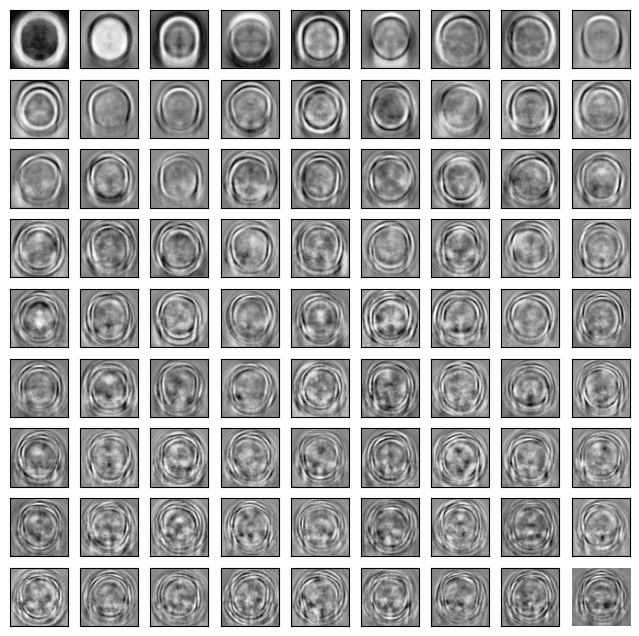

Number of PCA components for PITUITARY TUMOR:  105


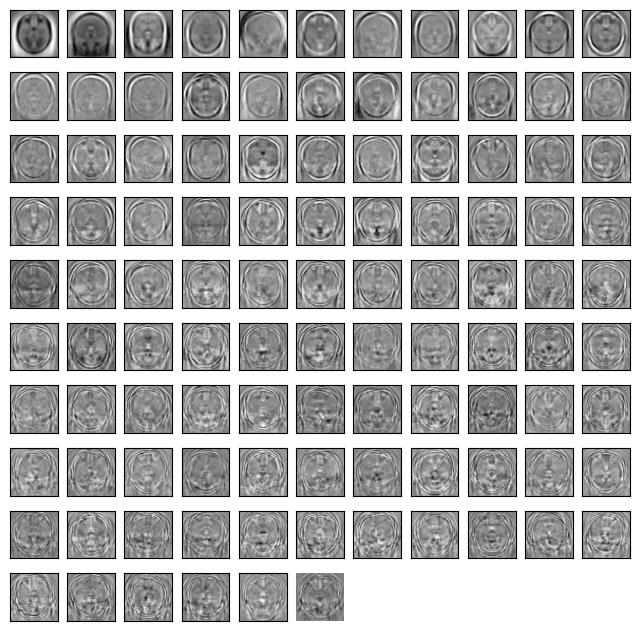

In [20]:
# from sklearn.decomposition import PCA
# from math import ceil

# def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
#     # fit PCA to describe n_comp * variability in the class
#     pca = PCA(n_components = n_comp, whiten = True)
#     pca.fit(full_mat)
#     print('Number of PC: ', pca.n_components_)
#     return pca
  
# def plot_pca(pca, size = (64, 64)):
#     # plot eigenimages in a grid
#     n = pca.n_components_
#     fig = plt.figure(figsize=(8, 8))
#     r = int(n**.5)
#     c = ceil(n/ r)
#     for i in range(n):
#         ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
#         ax.imshow(pca.components_[i].reshape(size), 
#                   cmap='Greys_r')
#     plt.axis('off')
#     plt.show()

# plot_pca(eigenimages(no_tumor_images, 'NO TUMOR'))
# plot_pca(eigenimages(glioma_tumor_images, 'GLIOMA TUMOR'))
# plot_pca(eigenimages(meningioma_tumor_images, 'MENINGIOMA TUMOR'))
# plot_pca(eigenimages(pituitary_tumor_images, 'PITUITARY TUMOR'))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from math import ceil

def flatten_images(images):
    # Flatten the image data
    n_samples = images.shape[0]
    h, w, c = images.shape[1], images.shape[2], images.shape[3]
    return images.reshape(n_samples, h * w * c)

def eigenimages(full_mat, title, n_comp=0.7, size=(100, 100)):
    # Flatten the images
    flattened_data = flatten_images(full_mat)
    
    # Fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components=n_comp, whiten=True)
    pca.fit(flattened_data)
    print(f'Number of PCA components for {title}: ', pca.n_components_)
    return pca, size

def plot_pca(pca, size=(100, 100)):
    # Plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n / r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks=[], yticks=[])
        # Reshape the PCA components back to the original image size
        component = pca.components_[i]
        component_image = component.reshape(size[0], size[1], -1)
        if component_image.shape[-1] == 1:
            component_image = component_image[:, :, 0]  # Convert single-channel to grayscale
        ax.imshow(component_image, cmap='Greys_r')
    plt.axis('off')
    plt.show()

# Example usage
no_tumor_pca, img_size = eigenimages(no_tumor_images, 'NO TUMOR', n_comp=0.7, size=(100, 100))
plot_pca(no_tumor_pca, size=img_size)

glioma_pca, img_size = eigenimages(glioma_tumor_images, 'GLIOMA TUMOR', n_comp=0.7, size=(100, 100))
plot_pca(glioma_pca, size=img_size)

meningioma_pca, img_size = eigenimages(meningioma_tumor_images, 'MENINGIOMA TUMOR', n_comp=0.7, size=(100, 100))
plot_pca(meningioma_pca, size=img_size)

pituitary_pca, img_size = eigenimages(pituitary_tumor_images, 'PITUITARY TUMOR', n_comp=0.7, size=(100, 100))
plot_pca(pituitary_pca, size=img_size)



##4. External Dataset Validation

The dataset contains real patient MRI scans, therefore, the data is valid.

## 5. Modeling

### Train and test sets

In [34]:
# # Function used to generate the training and testing sets by combining all
# # images into just a training and test set.
# def train_test_1set(size, labels):
#   # Train sets
#   X_train, X_test, y_train, y_test = [], [], [], []
#   # Folder paths
#   # Training set
#   for label in labels:
#     folderPath = os.path.join('../data','train',label)
#     # Getting unique file names and using them to finish the file path
#     # Display progress
#     for unique in tqdm(os.listdir(folderPath)):
#         # Reading images 
#         image = cv2.imread(os.path.join(folderPath, unique))
#         # Set image size to the defined size
#         image = cv2.resize(image,(size, size))
#         # Appending the image to the X train set
#         X_train.append(image)
#         # Appending the label for the corresponding image
#         y_train.append(label)

#   # Testing set     
#   for label in labels:
#       folderPath = os.path.join('../data','Test',label)
#       # Getting unique file names and using them to finish the file path
#       # Display progress
#       for unique in tqdm(os.listdir(folderPath)):
#           # Reading the image
#           image = cv2.imread(os.path.join(folderPath, unique))
#           # Resizing the image according to the specified value
#           image = cv2.resize(image,(size,size))
#           # Appending the image to the train set
#           X_train.append(image)
#           # Appending the label of the correcponding image to the test set
#           y_train.append(label)
#           # Creating numpy arrays
#   return X_train, y_train

import os
import cv2
from tqdm import tqdm

def train_test_1set(size, labels):
    X_train = []
    y_train = []

    for label in labels:
        # Define the path to the training images for the current label
        folderPath = os.path.join('data', 'train', label)
        
        # Display progress
        for unique in tqdm(os.listdir(folderPath), desc=f"Processing {label}"):
            # Reading the image
            image = cv2.imread(os.path.join(folderPath, unique))
            if image is None:
                print(f"Warning: Image {unique} could not be read.")
                continue
            # Resize the image according to the specified size
            image = cv2.resize(image, (size, size))
            # Append the image and its label to the training sets
            X_train.append(image)
            y_train.append(label)
    
    return X_train, y_train

# Example usage
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
X_train, y_train = train_test_1set(150, labels)


Processing pituitary: 100%|██████████| 1457/1457 [00:05<00:00, 290.61it/s]


In [37]:
# Function used to generate the training and testing sets according to the
# original divisions.
def train_test_2sets(size, labels):
  # Train sets
  X_train, X_test, y_train, y_test = [], [], [], []
  # Folder paths
  # Training set
  for label in labels:
     folderPath = os.path.join('data', 'train', label)
    # Getting unique file names and using them to finish the file path
    # Display progress
  for unique in tqdm(os.listdir(folderPath)):
        # Reading images 
        image = cv2.imread(os.path.join(folderPath, unique))
        # Set image size to the defined size
        image = cv2.resize(image,(size, size))
        # Appending the image to the X train set
        X_train.append(image)
        # Appending the label for the corresponding image
        y_train.append(label)

  # Testing set     
  for label in labels:
      folderPath = os.path.join('data','Test',label)
      # Getting unique file names and using them to finish the file path
      # Display progress
      for unique in tqdm(os.listdir(folderPath)):
          # Reading the image
          image = cv2.imread(os.path.join(folderPath, unique))
          # Resizing the image according to the specified value
          image = cv2.resize(image,(size,size))
          # Appending the image to the train set
          X_test.append(image)
          # Appending the label of the correcponding image to the test set
          y_test.append(label)
          # Creating numpy arrays
  return X_train, X_test, y_train, y_test

In [39]:
# Image folder labels

labels = ['glioma','meningioma','notumor','pituitary']

# Funcion call
X_train, y_train = train_test_1set(150, labels)

Processing pituitary: 100%|██████████| 1457/1457 [00:04<00:00, 315.30it/s]


In [1]:
# Two sets
X2_train, X2_test, y2_train, y2_test = train_test_2sets(150, labels)

NameError: name 'train_test_2sets' is not defined

In [41]:
# Converting to array
X_train = np.array(X_train)
y_train = np.array(y_train)
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)
# Dataset shapes
print('Dataset shapes')
print(f'{"-"*30}\n')
print('First set:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}\n')
print('Second set:')
print(f'X_train: {X2_train.shape}')
print(f'X_test: {X2_test.shape}')
print(f'y_train: {y2_train.shape}')
print(f'y_test: {y2_test.shape}')

Dataset shapes
------------------------------

First set:
X_train: (5712, 150, 150, 3)
y_train: (5712,)

Second set:
X_train: (1457, 150, 150, 3)
X_test: (1311, 150, 150, 3)
y_train: (1457,)
y_test: (1311,)


The feature sets have 3 channels, indicating that the images are in RGB format.

### Shuffling and Label Encoding

**Shuffling**

*First set*

In [43]:
# Shuffling the training sets to randomize the order
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

Train-test-split

In [45]:
# Train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state = 0)

*Second Set*

In [46]:
# Shuffling
from sklearn.utils import shuffle
X2_train, y2_train = shuffle(X2_train, y2_train, random_state = 0)
X2_test, y2_test = shuffle(X2_test, y2_test, random_state = 0)

**Encoding**

*Label Encoding*

In [48]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

y1_train = LabelEncoder().fit_transform(y_train)
y1_test = LabelEncoder().fit_transform(y_test)
y2_train = LabelEncoder().fit_transform(y2_train)
y2_test = LabelEncoder().fit_transform(y2_test)

*One-Hot Encoding*

### Convolutional Neural Networks

In [56]:
# Model evaluation line plot
def History(hist):
  fig, ax = plt.subplots(figsize = (10, 5))
  plt.plot(hist.history['accuracy'], label = 'Accuracy')
  plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.5, 1])
  plt.legend(loc = 'upper right')
  plt.show()

In [73]:
# First CNN model function
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report, confusion_matrix
# from tensorflow.keras import layers as layer, models

# def Model1(shape, labels, X_train, X_test, y_train, y_test, loss='sparse_categorical_crossentropy'):
#     # Model definition
#     model = models.Sequential()
#     model.add(layer.Input(shape=shape))
#     model.add(layer.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(layer.MaxPooling2D((2, 2)))
#     model.add(layer.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layer.MaxPooling2D((2, 2)))
#     model.add(layer.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layer.MaxPooling2D((2, 2)))
    
#     # Adding dense layers on top
#     model.add(layer.Flatten())
#     model.add(layer.Dense(64, activation='relu'))
#     model.add(layer.Dropout(0.5))
#     model.add(layer.Dense(len(labels), activation='softmax'))
    
#     # Model summary
#     print('CNN Layer Model Summary\n')
#     print(model.summary())
    
#     # Model compilation
#     model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
#     # Fitting the model
#     history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    
#     print('\nModel Evaluation\n')
#     # Plotting the train and validation accuracy and loss plots
#     History(history)
    
#     # Accuracy
#     print('\nModel Accuracy and Loss\n')
#     test_loss, test_acc = model.evaluate(X_test, y_test)
#     print(f'Test Accuracy: {test_acc}')
#     print(f'Test Loss: {test_loss}')
    
#     # Prediction
#     pred = np.argmax(model.predict(X_test), axis=1)
    
#     # Check if y_test is one-hot encoded or label encoded
#     if y_test.ndim > 1:  # Assuming y_test is one-hot encoded
#         y_test_new = np.argmax(y_test, axis=1)
#     else:
#         y_test_new = y_test
    
#     # Classification report
#     print('\nClassification Report\n')
#     report = classification_report(y_test_new, pred, target_names=[str(label) for label in labels])
#     print(report)
    
#     # Heatmap
#     fig, ax = plt.subplots(figsize=(10, 8))
#     sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels, annot=True,
#                 cmap='viridis', fmt='g')
#     plt.title('Heatmap', y=1.05)
# #     plt.show()
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report, confusion_matrix
# from tensorflow.keras import layers as layer, models

# def Model1(shape, labels, X_train, X_test, y_train, y_test, loss='sparse_categorical_crossentropy'):
#     # Model definition
#     model = models.Sequential()
#     model.add(layer.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=shape))
#     model.add(layer.MaxPooling2D((2, 2)))
#     model.add(layer.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layer.MaxPooling2D((2, 2)))
#     model.add(layer.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layer.MaxPooling2D((2, 2)))
    
#     # Adding dense layers on top
#     model.add(layer.Flatten())
#     model.add(layer.Dense(64, activation='relu'))
#     model.add(layer.Dropout(0.5))
#     model.add(layer.Dense(len(labels), activation='softmax'))
    
#     # Model summary
#     print('\nModel Summary\n')
#     print(model.summary())
    
#     # Model Evaluation
#     model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
#     history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
    
#     # Plotting the train and validation accuracy line plots
#     History(history)
    
#     print('\nModel Evaluation\n')
    
#     # Accuracy
#     print('\nModel Accuracy and Loss\n')
#     test_loss, test_acc = model.evaluate(X_test, y_test)
#     print(f'Test Accuracy: {test_acc}')
#     print(f'Test Loss: {test_loss}')
    
#     # Prediction
#     pred = model.predict(X_test)
#     pred_classes = np.argmax(pred, axis=1)
#     y_test_classes = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test  # Convert one-hot to class indices if needed
    
#     # Classification report
#     print('\nClassification Report\n')
#     report = classification_report(y_test_classes, pred_classes, target_names=[str(label) for label in labels])
#     print(report)
    
#     # Heatmap
#     fig, ax = plt.subplots(figsize=(10, 8))
#     sns.heatmap(confusion_matrix(y_test_classes, pred_classes), xticklabels=labels, yticklabels=labels, annot=True, cmap='viridis', fmt='g')
#     plt.title('Heatmap', y=1.05)
#     plt.show()



In [83]:
#model 1 final
from tensorflow.keras import layers as layer, models

def Model1(shape, labels, X_train, X_test, y_train, y_test, loss='sparse_categorical_crossentropy'):
    # Model definition
    model = models.Sequential()
    model.add(layer.Input(shape=shape))  # Use Input layer to specify input shape
    model.add(layer.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layer.MaxPooling2D((2, 2)))
    model.add(layer.Conv2D(64, (3, 3), activation='relu'))
    model.add(layer.MaxPooling2D((2, 2)))
    model.add(layer.Conv2D(64, (3, 3), activation='relu'))
    model.add(layer.MaxPooling2D((2, 2)))
    
    # Adding dense layers on top
    model.add(layer.Flatten())
    model.add(layer.Dense(64, activation='relu'))
    model.add(layer.Dropout(0.5))
    model.add(layer.Dense(len(labels), activation='softmax'))
    
    # Model summary
    print('\nModel Summary\n')
    print(model.summary())
    
    # Model Evaluation
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    
    # Plotting the train and validation accuracy line plots
    History(history)
    
    print('\nModel Evaluation\n')
    
    # Accuracy
    print('\nModel Accuracy and Loss\n')
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_acc}')
    print(f'Test Loss: {test_loss}')
    
    # Prediction
    pred = model.predict(X_test)
    pred_classes = np.argmax(pred, axis=1)
    
    # Convert y_test to class indices if one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test
    
    # Classification report
    print('\nClassification Report\n')
    try:
        report = classification_report(y_test_classes, pred_classes, target_names=[str(label) for label in labels])
        print(report)
    except ValueError as e:
        print(f"Error: {e}")
        print(f"Predicted classes: {np.unique(pred_classes)}")
        print(f"Actual classes: {np.unique(y_test_classes)}")
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test_classes, pred_classes), xticklabels=labels, yticklabels=labels, annot=True, cmap='viridis', fmt='g')
    plt.title('Heatmap', y=1.05)
    plt.show()


In [2]:
# Input features shape
shape = X_train.shape[1:]
shape

NameError: name 'X_train' is not defined

**First Model**


Model Summary



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,648 (4.73 MB)

 Trainable params: 1,240,648 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.9083 - loss: 9.9519 - val_accuracy: 0.2288 - val_loss: 19905.5352
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 421ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2288 - val_loss: 21192.3379
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 402ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2288 - val_loss: 21210.5059
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.9995 - loss: 0.6354 - val_accuracy: 0.2288 - val_loss: 5950.2476
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.9998 - loss: 0.0064 - val_accuracy: 0.2288 - val_loss: 7741.7705
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 425ms/step - accuracy: 0.9998 - loss: 0.0714 - val_accuracy: 0.2288 - val_loss: 9016.4648
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 536ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2288 - val_loss: 9532.2939
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 421ms/step - a

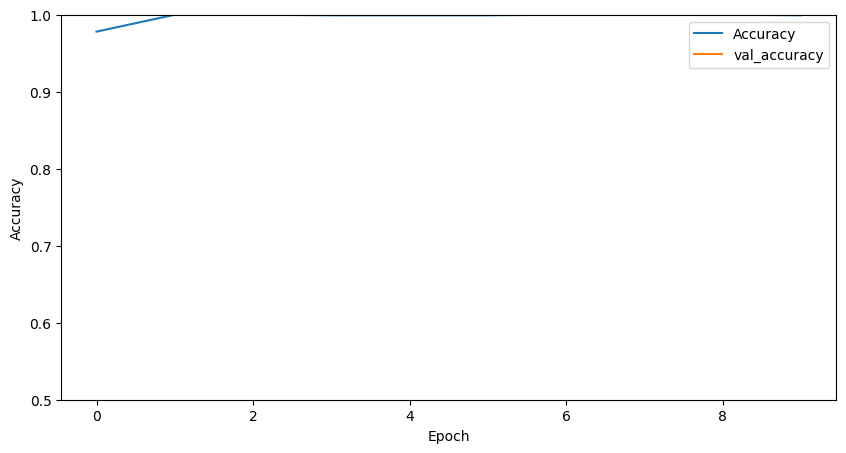


Model Evaluation


Model Accuracy and Loss

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.2245 - loss: 11368.8340
Test Accuracy: 0.22883294522762299
Test Loss: 11294.169921875
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step

Classification Report

Error: Number of classes, 4, does not match size of target_names, 8. Try specifying the labels parameter
Predicted classes: [0]
Actual classes: [0 1 2 3]


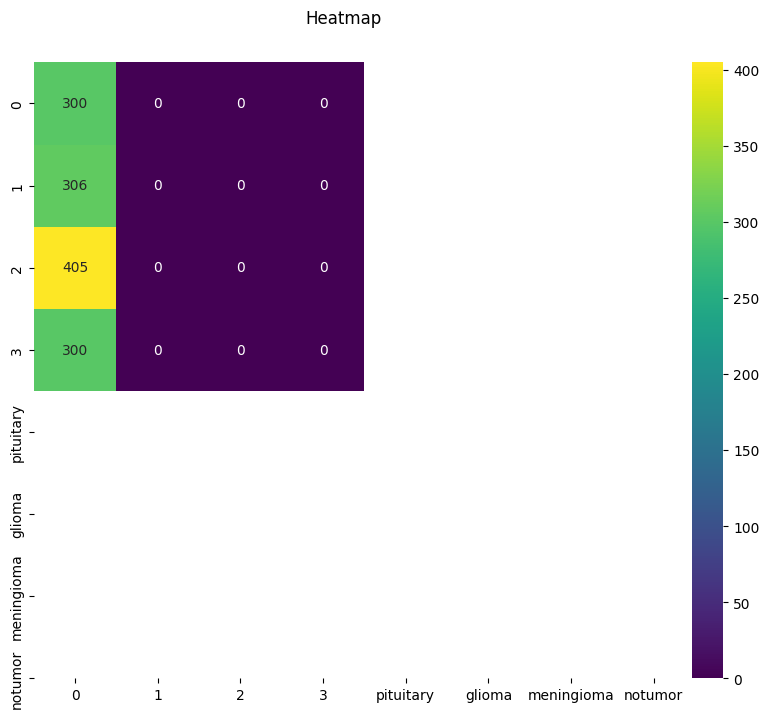

In [85]:
# 2nd dataset, label encoded target
Model1(shape, labels, X2_train, X2_test, y2_train, y2_test, loss = 'sparse_categorical_crossentropy')

For the second dataset, model prediction accuracy drops to 35%. Though it varies every time the function is executed. The accuracy is always lower than the previous model, therefore, the second dataset will not be used.

**Second Model**

In [121]:
from tensorflow.keras.layers import Input
from sklearn.metrics import classification_report, confusion_matrix
def Model2(shape, labels, X_train, X_test, y_train, y_test, loss='sparse_categorical_crossentropy'):
    model = models.Sequential()
    
    # Define the model
    model.add(Input(shape=shape))
    model.add(layer.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layer.MaxPooling2D((2, 2)))
    model.add(layer.Conv2D(64, (3, 3), activation='relu'))
    model.add(layer.MaxPooling2D((2, 2)))
    model.add(layer.Conv2D(64, (3, 3), activation='relu'))
    model.add(layer.MaxPooling2D((2, 2)))
    model.add(layer.Flatten())
    model.add(layer.Dense(64, activation='relu'))
    model.add(layer.Dropout(0.5))
    model.add(layer.Dense(len(labels), activation='softmax'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

    # Evaluate the model
    print('\nModel Evaluation\n')
    History(history)
    print('\nModel Accuracy and Loss\n')
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_acc}')
    print(f'Test Loss: {test_loss}')

    # Make predictions
    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)

    # Process y_test for classification report
    y_test_new = y_test  # Directly use y_test if it is integer encoded

    # Classification report
    print('\nClassification Report\n')
    report = classification_report(y_test_new, pred, target_names=[str(label) for label in labels], zero_division=0)
    print(report)

    # Confusion matrix heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels, annot=True, cmap='viridis', fmt='g')
    plt.title('Heatmap', y=1.05)


y_test shape: (572,)
Unique values in y_train: [0 1 2 3]
Unique values in y_test: ['glioma' 'meningioma' 'notumor' 'pituitary']
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 51s 305ms/step - accuracy: 0.2870 - loss: 18.2611 - val_accuracy: 0.2640 - val_loss: 1.3854
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 58s 361ms/step - accuracy: 0.2825 - loss: 1.3843 - val_accuracy: 0.2640 - val_loss: 1.3852
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 171ms/step - accuracy: 0.2838 - loss: 1.3836 - val_accuracy: 0.2640 - val_loss: 1.3854
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 173ms/step - accuracy: 0.2818 - loss: 1.3827 - val_accuracy: 0.2640 - val_loss: 1.3855
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.2728 - loss: 1.3848 - val_accuracy: 0.2640 - val_loss: 1.3856

Model Evaluation



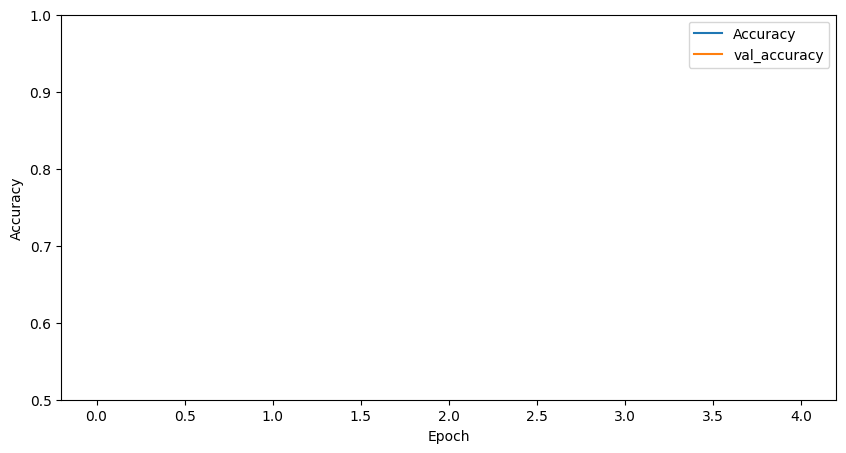


Model Accuracy and Loss

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2647 - loss: 1.3838
Test Accuracy: 0.2639860212802887
Test Loss: 1.3855983018875122
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step

Classification Report

              precision    recall  f1-score   support

     class_1       0.00      0.00      0.00       135
     class_2       0.00      0.00      0.00       137
     class_3       0.26      1.00      0.42       151
     class_4       0.00      0.00      0.00       149

    accuracy                           0.26       572
   macro avg       0.07      0.25      0.10       572
weighted avg       0.07      0.26      0.11       572



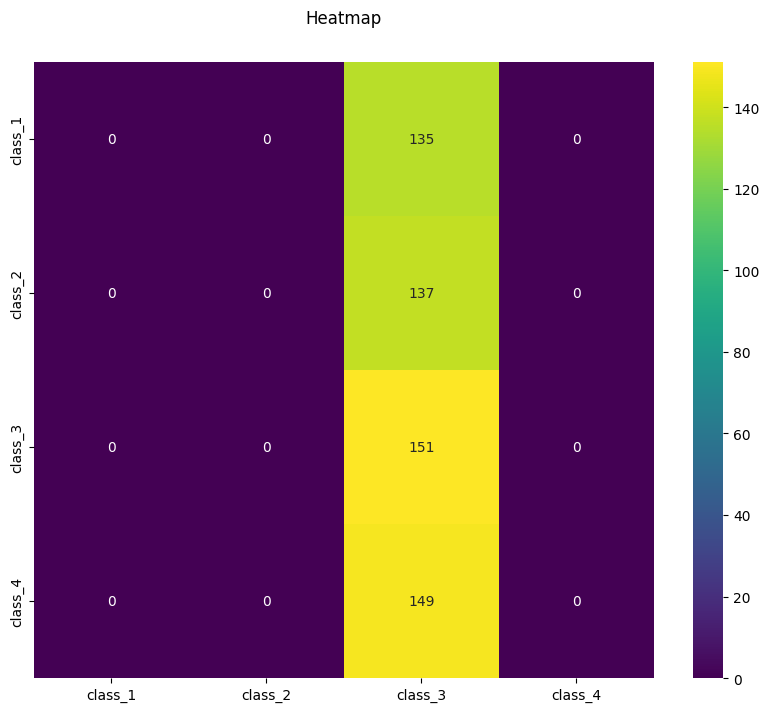

In [122]:
# For one-hot encoded labels
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

# For integer encoded labels


labels = ['class_1', 'class_2', 'class_3', 'class_4']  # Update with your actual class names

print("y_test shape:", y_test.shape)



print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Model2(shape, labels, X_train, X_test, y1_train, y1_test, loss='sparse_categorical_crossentropy')


* The accuracy increases to 80%. Though the accuracy varies for every execution of the model function, the accuracy never goes below 80%. 
* The F1 and precison scores of the model do not meet the set success criteria.
* This dataset has the highest average accuracy of the three models. Therefore, the first dataset, as well as the One-Hot encoded label column will be used.

In [132]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert lists to numpy arrays if necessary
y_train = np.array(y_train)
y_test = np.array(y_test)

# Convert labels to one-hot encoding if necessary
if y_train.ndim == 2:
    y_train = to_categorical(y_train, num_classes=len(labels))
if y_test.ndim == 2:
    y_test = to_categorical(y_test, num_classes=len(labels))


**Third Model**

In [136]:
# CNN function for the second model
# from tensorflow.keras.layers import Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def Model3(shape, labels, X_train, X_test, y_train, y_test, loss='categorical_crossentropy'):
    # Convert lists to numpy arrays if necessary
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train).flatten()  # Ensure y_train is a flat array
    y_test = np.array(y_test).flatten()    # Ensure y_test is a flat array
    
    # Create a label-to-integer mapping
    label_to_int = {label: i for i, label in enumerate(labels)}
    
    # Convert string labels to integer labels
    try:
        y_train_int = np.array([label_to_int[label] for label in y_train])
        y_test_int = np.array([label_to_int[label] for label in y_test])
    except KeyError as e:
        print(f"Label '{e.args[0]}' not found in label_to_int mapping.")
        return
    
    # Convert labels to one-hot encoding if using categorical_crossentropy
    if loss == 'categorical_crossentropy':
        y_train = to_categorical(y_train_int, num_classes=len(labels))
        y_test = to_categorical(y_test_int, num_classes=len(labels))
    elif loss == 'sparse_categorical_crossentropy':
        # No need to convert labels for sparse_categorical_crossentropy
        y_train = y_train_int
        y_test = y_test_int
    
    # Model definition
    model = models.Sequential()
    model.add(layer.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=shape))
    model.add(layer.MaxPool2D((2, 2)))
    model.add(layer.Flatten())
    model.add(layer.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layer.Dropout(0.5))
    model.add(layer.Dense(len(labels), activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
    
    # Evaluate the model
    print('\nModel Accuracy and Loss\n')
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_acc}')
    print(f'Test Loss: {test_loss}')
    
    # Make predictions
    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)
    
    # Convert y_test back to single dimension if it was one-hot encoded
    if y_test.ndim == 2:
        y_test_new = np.argmax(y_test, axis=1)
    else:
        y_test_new = y_test
    
    # Classification report
    print('\nClassification Report\n')
    report = classification_report(y_test_new, pred, target_names=[str(label) for label in labels], zero_division=0)
    print(report)
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels, annot=True, cmap='viridis', fmt='g')
    plt.title('Confusion Matrix', y=1.05)
    plt.show()

# Function call example
# Assuming you have defined `shape`, `labels`, `X_train`, `X_test`, `y_train`, and `y_test`
Model3(shape, labels, X_train, X_test, y_train, y_test, loss='categorical_crossentropy')


Label '0.0' not found in label_to_int mapping.


* The model has a persisting low accuracy that ranges from 20% to 35%. Therefore, decreasing the CNN layers leads to a subsequent low prediction accuracy of the model.
* The model is also completely biased towards the glioma tumour class, therefore, the model is also overfitting.

**Transfer Learning**

*EfficientNetB0*
This Keras application has a good trade-off between accuracy and time(ms) per inference step for both CPU and GPU [link](https://keras.io/api/applications/).

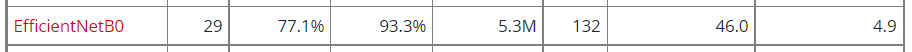



Function definition

In [2]:
# Pre-trained model
def pre_trained_performance(shape, labels, X_train, X_test, y_train, y_test):
  # Pre-trained model
  efficient_net = EfficientNetB0(input_shape = shape, weights='imagenet',include_top=False)
  # Model definition
  model = efficient_net.output
  model = tf.keras.layers.GlobalAveragePooling2D()(model)
  model = tf.keras.layers.Dropout(rate=0.5)(model)
  model = tf.keras.layers.Dense(4,activation='softmax')(model)
  model = tf.keras.models.Model(inputs=efficient_net.input, outputs = model)
  # Model summary
  # model.summary()
  # Compiling the model
  model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
  # Model fit
  history = model.fit(X_train,y_train,validation_data = (X_test, y_test), epochs =12, verbose=1, batch_size=32)
  print('\nModel Evaluation\n')
  History(history)
  print()
  print()
  # Accuracy
  print('\nModel Accuracy and Loss\n')
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f'Test Accuracy: {test_acc}')
  print(f'TestLoss: {test_loss}')
  print()
  print()
  # Prediction
  pred = model.predict(X_test)
  pred = np.argmax(pred,axis=1)
  y_test_new = np.argmax(y_test,axis=1)
  # Classification report
  print('\nClassification Report\n')
  report = classification_report(y_test_new, pred)
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels,annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05)


In [1]:
# Saving the original model and a tflite model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers as layer, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def pre_trained_performance(shape, labels, X_train, X_test, y_train, y_test):
    # Convert lists to numpy arrays if necessary
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train).flatten()  # Ensure y_train is a flat array
    y_test = np.array(y_test).flatten()    # Ensure y_test is a flat array
    
    # Create a label-to-integer mapping
    label_to_int = {label: i for i, label in enumerate(labels)}
    
    # Convert string labels to integer labels
    try:
        y_train_int = np.array([label_to_int[label] for label in y_train])
        y_test_int = np.array([label_to_int[label] for label in y_test])
    except KeyError as e:
        print(f"Label '{e.args[0]}' not found in label_to_int mapping.")
        return
    
    # Convert labels to one-hot encoding if using categorical_crossentropy
    y_train = to_categorical(y_train_int, num_classes=len(labels))
    y_test = to_categorical(y_test_int, num_classes=len(labels))
    
    # Pre-trained model
    efficient_net = EfficientNetB0(input_shape=shape, weights='imagenet', include_top=False)
    model = models.Sequential()
    model.add(efficient_net)
    model.add(layer.GlobalAveragePooling2D())
    model.add(layer.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layer.Dropout(0.5))
    model.add(layer.Dense(len(labels), activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
    
    # Evaluate the model
    print('\nModel Accuracy and Loss\n')
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_acc}')
    print(f'Test Loss: {test_loss}')
    
    # Make predictions
    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)
    
    # Convert y_test back to single dimension if it was one-hot encoded
    if y_test.ndim == 2:
        y_test_new = np.argmax(y_test, axis=1)
    else:
        y_test_new = y_test
    
    # Classification report
    print('\nClassification Report\n')
    report = classification_report(y_test_new, pred, target_names=[str(label) for label in labels], zero_division=0)
    print(report)
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test_new, pred), xticklabels=labels, yticklabels=labels, annot=True, cmap='viridis', fmt='g')
    plt.title('Confusion Matrix', y=1.05)
    plt.show()

# Function call example
# Assuming you have defined `shape`, `labels`, `X_train`, `X_test`, `y_train`, and `y_test`
pre_trained_performance(shape, labels, X_train, X_test, y_train, y_test)


NameError: name 'shape' is not defined

* The model accuracy becomes stable, achieving a high value of 96 - 97%. Instances of misclassification are low. More images can be used to train the model, in order to try and rectify this.
* Though the classes are imbalanced, each class achieves a high F1 score >=94% and high precision scores >= 93%.
* Therefore, this model has the highest and most stable prediction accuracy (performance). It will be used to implement the solution.

In [170]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers as layer, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import FileLink

def save_pretrained_model(shape, labels, X_train, X_test, y_train, y_test):
    # Convert lists to numpy arrays if necessary
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train).flatten()  # Ensure y_train is a flat array
    y_test = np.array(y_test).flatten()    # Ensure y_test is a flat array
    
    # Create a label-to-integer mapping
    label_to_int = {label: i for i, label in enumerate(labels)}
    
    print("Label to integer mapping:", label_to_int)
    
    # Convert string labels to integer labels
    try:
        y_train_int = np.array([label_to_int[label] for label in y_train])
        y_test_int = np.array([label_to_int[label] for label in y_test])
    except KeyError as e:
        print(f"Label '{e.args[0]}' not found in label_to_int mapping.")
        return
    
    # Convert labels to one-hot encoding
    y_train = to_categorical(y_train_int, num_classes=len(labels))
    y_test = to_categorical(y_test_int, num_classes=len(labels))
    
    # Pre-trained model
    efficient_net = EfficientNetB0(input_shape=shape, weights='imagenet', include_top=False)
    model = models.Sequential()
    model.add(efficient_net)
    model.add(layer.GlobalAveragePooling2D())
    model.add(layer.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layer.Dropout(0.5))
    model.add(layer.Dense(len(labels), activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Callbacks
    log_dir = 'logs'
    os.makedirs(log_dir, exist_ok=True)
    
    tensorboard = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint("effnet.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
    
    # Fit the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks=[tensorboard, checkpoint])
    
    # Evaluate the model
    print('\nModel Accuracy and Loss\n')
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_acc}')
    print(f'Test Loss: {test_loss}')
    
    # Convert to TensorFlow Lite
    tflite_model_path = "model.tflite"
    convert_to_tflite("effnet.h5", tflite_model_path)

    # Provide download link
    return FileLink(tflite_model_path)

def convert_to_tflite(model_path, tflite_model_path):
    model = tf.keras.models.load_model(model_path)
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)
    print(f"Model converted to TFLite and saved to {tflite_model_path}")

# Function call example
# Assuming you have defined `shape`, `labels`, `X_train`, `X_test`, `y_train`, and `y_test`
tflite_file_link = save_pretrained_model(shape, labels, X_train, X_test, y_train, y_test)

# Display the link in the notebook
if tflite_file_link:
    display(tflite_file_link)


Label to integer mapping: {'class_1': 0, 'class_2': 1, 'class_3': 2, 'class_4': 3}
Label '0.0' not found in label_to_int mapping.


These models will be deployed in a stramlit user interface.

**Model Performance Summary**

1. *Manually Trained Model - (One-Hot Encoded label)*
* Accuracy = 80% (varies for different instances of model fitting, but never goes below 80% or higher than 86% - unstable performance).
* High model bias towards the pituitary tumour class. (Other classes have an F1 score lower than 0.8, while the latter has an F1 score of 0.94).
* The precision of each class is below 90%, these values are inadequate, as the detection and classificication of brain tumours is a sensitive matter, and false predictions will not be tolerated.

2. *Model fitting on pre-trained model - (EfficientNetB0)*
* Accuracy = 98% (rounded off), a great improvement from the previous model. Furthermore, accuracy never goes below 96% every time the model is fit, therefore, it has a more stable and reliable perfomance.
* Though the classes are imbalanced, all classes have an F1 score >=96%, greatly reducing the bias previously seen in the preceding model.
* The model attains high class precision values >= 93%. Therefore, there are very few instances of false detections and classifications.



> A dropout layer (rate = 0.5) was used to reduce overfitting.



## 6. Implementing the Solution

The model application has been implemented and deployed on streamlit. 
1. Streamlit - [brain tumour classification application](https://share.streamlit.io/deborahmasibo/moringa-core-module-2-project/main/bt2/braintumour2.py)

2. Test dataset - [test set](https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/tree/master/Testing)


## 7. Challenging the Solution

Different CNN models have been trained, each with a varying perormance. 
1. The first model, trained on a train-test-split dataset, had a label encoded label. Its performance varied from an accuarcy as low as 20%, to 80%. Therefore, its performance was unstable and unreliable.
2. The second model, was trained on the original training and testing sets. It had a consistently poor accuracy of around 25%.
3. The third model was trained on a train-test-split dataset, but with a label OneHot encoded label. It had the highest prediction accuracy of > 80%, but lower that 87%.
4. The fourth model had fewer hidden layers. Its prediction accuracy was very low, averaging at around 25%.

> These models had varying accuracies every time the models were fit.

5. The final model was pre-trained using Keras' EfficientNetB0 model. The prediction accuracy ranged from 96 - 97%. Furthermore, the calss F1 scores were > 90%, and the precision scores were >= 93%. Therefore, this model was used to implement the final prediction model.

## 8. Conclusion

Modeling using transfer learning leads to very accurate predictions, and each class has an F1 score > 90%. The overall prediction accuracy is 96 - 97%, and precision scores are >= 93%, which meets the success criteria.

The tflite model performed predictions at a higher speed than the original model. It also had lower storage requirements, therefore, it was implemented in the streamlit web application.

## 9. Follow up questions

### a). Did we have the right data?

Yes, we have the right data, as brain MRI scans are used to detect brain tumours.


### b). Do we need other data to answer our question?

Yes, more data will improve the prediction accuracy of the model, as more patterns will be derived from varying images. Furthermore, more data can be used to rectify the class imbalance, in order to reduce model prediction bias.


### c). Did we have the right question?

Yes, as implementation of its solution has led to the development of a model with a high accuracy of 96 - 97%, F1 scores > 90% and precision scores >= 93%.


